In [ ]:
import torch
import numpy as np
x = torch.tensor([1,2,3])

In [ ]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])

In [ ]:
t[:,:-2]

tensor([[ 1.],
        [ 4.],
        [ 7.],
        [10.]])

In [ ]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


여러 함수들에서 dim을 쓰게 된다면 dim으로 넣어준 차원을 없앤다는 의미로 해석하면 된다.

즉 예를 들어 

```
x = torch.FloatTensor([[1, 2], [3, 4]])
x.sum(dim=0) 
```
이와 같이하면 1번째 차원 즉 행을 없애겠다는 의미로
출력은 다음과 같이 된다.
```
# original x
[[1, 2],
 [3, 4]]

# x.sum(dim = 0)
[4,6]
```





In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
t.sum(dim=0)

tensor([4., 6.])

# PyTorch Base

## 03. Tensor Manipulation

In [ ]:
import numpy as np

### 뷰(View) - 원소의 수를 유지하면서 텐서의 크기 변경. 매우 중요함!!
- 파이토치 텐서의 View는 numpy에서의 Reshape와 같은 역할을 합니다. Reshape라는 이름에서 알 수 있듯이, 텐서의 크기(Shape)를 변경해주는 역할을 합니다.

- view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 합니다.
- 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추합니다.

In [ ]:
# view

t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [ ]:
ft.shape

torch.Size([2, 2, 3])

In [ ]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### 스퀴즈(Squeeze) - 1인 차원을 제거한다.
- 스퀴즈는 차원이 1인 경우에는 해당 차원을 제거합니다.
- 실습을 위해 임의로 (3 × 1)의 크기를 가지는 2차원 텐서를 만들겠습니다.

In [ ]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.
언스퀴즈는 스퀴즈와 정반대입니다. 특정 위치에 1인 차원을 추가할 수 있습니다.
실습을 위해 임의로 (3,)의 크기를 가지는 1인 차원 텐서를 만들겠습니다.

In [ ]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
ft = torch.FloatTensor([[0], [1], [2]])
ft.view([3]).shape

torch.Size([3])

In [ ]:
ft = torch.Tensor([0, 1, 2])
ft.view([-1,3]).shape

torch.Size([1, 3])

view(), squeeze(), unsqueeze()는 텐서의 원소 수를 그대로 유지하면서 모양과 차원을 조절합니다.

### 타입 캐스팅(Type Casting)

텐서에는 자료형이라는 것이 있습니다. 각 데이터형별로 정의되어져 있는데, 예를 들어 32비트의 부동 소수점은 torch.FloatTensor를, 64비트의 부호 있는 정수는 torch.LongTensor를 사용합니다. GPU 연산을 위한 자료형도 있습니다. 예를 들어 torch.cuda.FloatTensor가 그 예입니다.

In [ ]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)
print(lt.float())

tensor([1, 2, 3, 4])
tensor([1., 2., 3., 4.])


In [ ]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


### 연결하기(concatenate)

딥 러닝에서는 주로 모델의 입력 또는 중간 연산에서 두 개의 텐서를 연결하는 경우가 많습니다. 두 텐서를 연결해서 입력으로 사용하는 것은 두 가지의 정보를 모두 사용한다는 의미를 가지고 있습니다.

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

# cat은 어느 차원을 늘릴 것인지 인자로 줄 수 있음 (dim=0은 첫번째 차원을 늘림)
print(torch.cat([x, y], dim=0)) # (2,2) -> (4,2)
print(torch.cat([x, y], dim=0).shape)

print(torch.cat([x, y], dim=1)) # (2,2) -> (2,4)
print(torch.cat([x, y], dim=1).shape)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])
torch.Size([2, 4])


### 스택킹(Stacking)
연결(concatenate)을 하는 또 다른 방법으로 스택킹(Stacking)이 있습니다. 스택킹은 영어로 쌓는다는 의미입니다. 때로는 연결을 하는 것보다 스택킹이 더 편리할 때가 있는데, 이는 스택킹이 많은 연산을 포함하고 있기 때문입니다.

In [ ]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))
print(torch.stack([x, y, z]).shape) # (2) -> (3,2)

print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0).shape)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])


In [ ]:
print(torch.stack([x, y, z], dim=1))
print(torch.stack([x, y, z], dim=1).shape) # (2) -> (2,3) 

print(torch.cat([x.unsqueeze(1),y.unsqueeze(1),z.unsqueeze(1)], dim=1))
print(torch.cat([x.unsqueeze(1),y.unsqueeze(1),z.unsqueeze(1)], dim=1).shape)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([1, 6])


###  ones_like와 zeros_like -> 0으로 채워진 텐서와 1로 채워진 텐서


In [ ]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[0., 1., 2.],
        [2., 1., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


### In-place Operation (덮어쓰기 연산)

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])

print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


## 04. Python Class



### 함수(function)과 클래스(Class)의 차이

#### 함수로 덧셈기 구현

In [ ]:
res = 0

def add(num):
  global res
  res += num
  return res

print(add(3))
print(add(4))

3
7


#### 함수로 두개의 덧셈기 구현

서로 값에 영향을 주지않고 서로 다른 연산을 수행함.
이런 두개의 덧셈기를 클래스로 구현할 수 있음.

In [ ]:
res1 = 0
res2 = 0

def add1(num):
  global res1
  res1 += num
  return res1

def add2(num):
  global res2
  res2 += num
  return res2

print(add1(3))
print(add1(4))

print(add2(3))
print(add2(7))

3
7
3
10


#### 클래스로 덧셈기 구현

두 개의 객체는 독립적으로 연산.

즉 클래스 선언 -> 클래스를 통해 별도의 객체 생성 -> 함수 사용하듯이 사용

In [ ]:
class Calculator:
  def __init__(self): # 객체 생성시 호출될 때 실행되는 초기화 함수로 생성자라고 함.
    self.result = 0
  
  def add(self, num):
    self.result += num
    return self.result

cal1 = Calculator()
cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


# Linear Regression (선형 회귀)

## 1. Linear Regression


### 데이터 구성

- 데이터는 PyTorch의 tensor의 형태를 띄어야 함.(torch.tensor)
```
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
```

### 가설(Hypothesis) 수립

- 머신 러닝에서 식을 세울때 이 식을 가설이라고 함.
- 선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일로 볼 수 있음.

y(H(x)) =Wx + b

- W를 가중치(Weight)라 하며, b를 편향(bias)이라 함.

### 비용 함수(Cost function)

- 비용 함수(cost function) = 손실 함수(loss function) = 오차함수(error function) = 목적 함수(objective function)
- 비용함수와 손실함수로써 많이 표현됨.
  - Mean Squared Error(MSE) : 오차의 제곱합에 대한 평균
  
    -> 즉 MSE를 통해 Cost function이 최소가 되게 만드는 W와 b를 구하는 것이 목표 

### Optimizer - Gradient Descent (경사 하강법)

- 앞서 정의한 Cost Fuction의 값을 최소로 하는 W와 b를 찾는 방법을 Optimizer 알고리즘(최적화 알고리즘)이라고 함.
- Optimizer 알고리즘을 통해 적절한 W와 b를 찾아내는 과정을 training(학습)이라고 한다.
- Gradient Descent는 cost가 최소화되는 지점으로 향하며 이는 접선의 기울기(미분값)이 0이 되는 지점임.
 - 이는 Cost function을 미분하여 현재 W에서 접선의 기울기를 구하고 접선의 기울기가 낮은 방향으로 W의 값을 변경하는 작업을 반복해나가면서 수행되어짐.
- Learning rate(학습률)은 무엇을 의미할까
 - 이는 W의 값을 변경해나갈 때 얼머나 크게 변경할지를 결정하는 hyper parameter라고 할 수 있음.


### Linear Regression 구현 (by PyTorch)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

In [ ]:
# 변수 선언(데이터)
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [ ]:
# Weight와 bias의 initialize(초기화)

# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True) # requires_grad -> 학습을 통해 계속 값이 변경되도록 함.
# 가중치 W를 출력
print(W) 

b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [ ]:
# Hyphothese(가설) 세우기

hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [ ]:
# Cost function 선언 (MSE)

cost = torch.mean((hypothesis - y_train)**2) # 평균제곱오차
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [ ]:
# Gradient Descent
optimizer = optim.SGD([W, b], lr=0.01)

# gradient를 0으로 초기화 / 새로운 가중치 편향에 대해서 새로운 기울기를 구하기 위함.
optimizer.zero_grad() 
# 비용 함수를 미분하여 gradient(W와 b) 계산
cost.backward() 
# W와 b를 업데이트 (인수로 들어갔던 W와 b에서 리턴되는 변수들의 기울기에 lr 0.01을 곱하여 빼줌으로서 업데이트)
optimizer.step() 

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

실제 정답은 W가 2이고, b가 0인 H(x) = 2x이므로 거의 정답을 찾음.

#### optimizer.zero_grad()가 필요한 이유
- PyTorch는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있음.

In [ ]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w
  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))
  # 계속 미분값이 누적됨. 그래서 zero_grad()를 통해 미분값을 계속 0으로 초기화

#### torch.manual_seed()를 하는 이유
- 이를 사용하면 다른 환경(컴퓨터)에서 실행해도 동일한 결과를 얻을 수 있음.
- 이는 난수 발생 순서와 값을 동일하게 보장해준다는 특징이 있기 때문임.

In [ ]:
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])


In [ ]:
torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])


In [ ]:
torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1,3):
  print(torch.rand(1))
# 같은 랜덤 시드값이기에 동일

랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])


#### requires_grad
- 텐서에는 requires_grad라는 속성이 있습니다. 이것을 True로 설정하면 자동 미분 기능이 적용됩니다. 선형 회귀부터 신경망과 같은 복잡한 구조에서 파라미터들이 모두 이 기능이 적용됩니다. requires_grad = True가 적용된 텐서에 연산을 하면, 계산 그래프가 생성되며 backward 함수를 호출하면 그래프로부터 자동으로 미분이 계산됩니다.



## Autograd (자동미분)

### Gradient Descent review
- cost function를 미분하여 cost function의 gradient를 구해서
cost가 최소화되는 방향을 찾아내는 알고리즘.
- 모델이 복잡해질수록 직접 코딩하는 것은 까다롭기 때문에 PyTorch에서 Autograd를 지원함.
 - Autograd를 사용하면 미분 계산을 자동화해주기 때문에 편리함.

In [ ]:
w = torch.tensor(2.0, requires_grad=True)

y = w**2
z = 2*y + 5

In [ ]:
# 수식을 w에 대해서 미분 즉 backward를 호출 시 해당 수식의 w에 대한 기울기 계산함.
z.backward()

print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


## Multivariable Linear regression (다중 선형 회귀)


### Data Definition

앞의 Linear regression과 다른 것은 독립 변수 x의 개수가 1개가 아닌 2개 이상이라는 것임.

### PyTorch 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) # random seed fix

In [ ]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
optimizer = optim.SGD([w1,w2,w3,b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hyphothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

  # cost 계산
  cost = torch.mean((hyphothesis - y_train) **2)

  # cost로 H(x) update
  optimizer.zero_grad() # W와 b 초기화
  cost.backward() # gradient 계산
  optimizer.step() # gradient update

    # 1000번마다 로그 출력
  if epoch % 100 == 0:
      print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
          epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
      ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


### PyTorch 구현 (by 벡터 및 행렬 연산)
- 행렬 곱센 연산 (or 벡터의 내적(dot product)) 

In [ ]:
# 데이터 선언 / 데이터 행렬로 선언해야 함
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

print(x_train.shape)
print(y_train.shape)

# 가중치와 편향 선언
# 행렬의 곱셈이 성립되도록 W의 크기 조절하여 선언
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

torch.Size([5, 3])
torch.Size([5, 1])


In [ ]:
# 이와 같이 가설 선언시 독립 변수 x의 수의 변화에 상관없이 수정하지 않아도 됨.
hypothesis = x_train.matmul(W) + b

In [ ]:
optimizer = optim.SGD([W,b], lr=1e-5)
nb_epoches = 1000

for epoch in range(0, nb_epochs+1):
  hypothesis = x_train.matmul(W) + b
  cost = torch.mean((hypothesis-y_train)**2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/1000 hypothesis: tensor([153.5467, 184.6471, 177.8833, 197.3390, 141.5258]) Cost: 1.802982
Epoch  100/1000 hypothesis: tensor([153.5299, 184.6406, 177.9288, 197.3092, 141.5380]) Cost: 1.737443
Epoch  200/1000 hypothesis: tensor([153.5132, 184.6345, 177.9730, 197.2800, 141.5502]) Cost: 1.674572
Epoch  300/1000 hypothesis: tensor([153.4967, 184.6287, 178.0161, 197.2514, 141.5624]) Cost: 1.614253
Epoch  400/1000 hypothesis: tensor([153.4803, 184.6232, 178.0581, 197.2234, 141.5746]) Cost: 1.556401
Epoch  500/1000 hypothesis: tensor([153.4640, 184.6181, 178.0990, 197.1961, 141.5867]) Cost: 1.500892
Epoch  600/1000 hypothesis: tensor([153.4478, 184.6133, 178.1388, 197.1693, 141.5988]) Cost: 1.447614
Epoch  700/1000 hypothesis: tensor([153.4318, 184.6087, 178.1776, 197.1431, 141.6108]) Cost: 1.396462
Epoch  800/1000 hypothesis: tensor([153.4159, 184.6044, 178.2154, 197.1174, 141.6228]) Cost: 1.347372
Epoch  900/1000 hypothesis: tensor([153.4002, 184.6004, 178.2523, 197.0923, 141.63

## nn.Module로 구현하는 Linear regression



### Simple Linear regression 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
# 데이터 y = 2x
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [ ]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

# 모델에는 랜덤 값으로 초기화된 W와 b가 저장되어 있음.
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]


In [ ]:
# optimizer 설정.SGD를 사용하고 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
nb_epochs = 2000

for epoch in range(nb_epochs+1):
  # H(x) 계산
  prediction = model(x_train)
  # cost 계산
  cost = F.mse_loss(prediction, y_train) # F.mse_loss는 PyTorch에서 제공하는 MSE 함수

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
     # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))   

Epoch    0/2000 Cost: 18.562185
Epoch  100/2000 Cost: 0.128051
Epoch  200/2000 Cost: 0.079128
Epoch  300/2000 Cost: 0.048896
Epoch  400/2000 Cost: 0.030215
Epoch  500/2000 Cost: 0.018671
Epoch  600/2000 Cost: 0.011538
Epoch  700/2000 Cost: 0.007129
Epoch  800/2000 Cost: 0.004406
Epoch  900/2000 Cost: 0.002722
Epoch 1000/2000 Cost: 0.001682
Epoch 1100/2000 Cost: 0.001040
Epoch 1200/2000 Cost: 0.000642
Epoch 1300/2000 Cost: 0.000397
Epoch 1400/2000 Cost: 0.000245
Epoch 1500/2000 Cost: 0.000152
Epoch 1600/2000 Cost: 0.000094
Epoch 1700/2000 Cost: 0.000058
Epoch 1800/2000 Cost: 0.000036
Epoch 1900/2000 Cost: 0.000022
Epoch 2000/2000 Cost: 0.000014


In [ ]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9926]], grad_fn=<AddmmBackward0>)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9957]], requires_grad=True), Parameter containing:
tensor([0.0097], requires_grad=True)]


- H(x) 식에 입력 x로부터 예측된 y 값을 얻어내는 것을 forward 연산이라 함.
  - 학습 전, prediction = model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산임.
  - 학습 후, pred_y = model(new_var)은 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산임.
- 학습 과정에서 cost function을 미분하여 gradient를 구하는 것을 backward 연산이라 함.
  - cost.backward()는 cost function으로부터 gradient(W, b)를 구한다는 의미이며 backward 연산임.

### Multi Variable regression 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
# 모델
model = nn.Linear(3,1)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
  # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/2000 Cost: 24821.373047
Epoch  100/2000 Cost: 0.849148
Epoch  200/2000 Cost: 0.825597
Epoch  300/2000 Cost: 0.803225
Epoch  400/2000 Cost: 0.781968
Epoch  500/2000 Cost: 0.761775
Epoch  600/2000 Cost: 0.742599
Epoch  700/2000 Cost: 0.724357
Epoch  800/2000 Cost: 0.707025
Epoch  900/2000 Cost: 0.690548
Epoch 1000/2000 Cost: 0.674883
Epoch 1100/2000 Cost: 0.659985
Epoch 1200/2000 Cost: 0.645810
Epoch 1300/2000 Cost: 0.632342
Epoch 1400/2000 Cost: 0.619514
Epoch 1500/2000 Cost: 0.607307
Epoch 1600/2000 Cost: 0.595680
Epoch 1700/2000 Cost: 0.584620
Epoch 1800/2000 Cost: 0.574083
Epoch 1900/2000 Cost: 0.564048
Epoch 2000/2000 Cost: 0.554477


In [ ]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) # 실제 y값은 152인데 거의 최적화됨.

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.6526]], grad_fn=<AddmmBackward0>)


In [ ]:
print(list(model.parameters())) # 3개의 w와 1개의 b

[Parameter containing:
tensor([[0.7497, 0.4868, 0.7725]], requires_grad=True), Parameter containing:
tensor([0.0386], requires_grad=True)]


## PyTorch 모델 구현 by Class

### 모델을 class로 구현

- class 형태의 모델은 nn.Module을 상속받게 된다.  
- __init__()에서 모델의 구조와 동작을 정의하는 생성자를 정의한다. 
  - 이는 파이썬에 객체가 갖는 속성값을 초기화하는 역할로 객체가 생성될 때 자동으로 호출된다.
  - super() 함수 호출시 여기서 만든 클래스는 nn.Module 클래스의 속성들을 가지고 초기화된다.
- forward() 함수는 모델이 학습데이터를 입력받아서 forward 연산을 수행하는 함수이다.
  - 예를 들어 만든 class를 통해 model이란 이름의 객체를 생성 후, model(입력 데이터)와 같은 형식으로 객체를 호출시 자동으로 forward 연산이 수행된다.
  - H(x) 식에 입력 x로부터 예측된 y 값을 얻어내는 것을 forward 연산이라고 한다.


#### Linear Regression model 구현

In [ ]:
#model = nn.Linear(1,1)

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)
  
  def forward(self,x):
    return self.linear(x)

model = LinearRegressionModel()

In [ ]:
# 데이터 y = 2x
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 2000

for epoch in range(nb_epochs+1):
  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
  # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/2000 Cost: 25.852583
Epoch  100/2000 Cost: 0.016970
Epoch  200/2000 Cost: 0.010486
Epoch  300/2000 Cost: 0.006480
Epoch  400/2000 Cost: 0.004004
Epoch  500/2000 Cost: 0.002474
Epoch  600/2000 Cost: 0.001529
Epoch  700/2000 Cost: 0.000945
Epoch  800/2000 Cost: 0.000584
Epoch  900/2000 Cost: 0.000361
Epoch 1000/2000 Cost: 0.000223
Epoch 1100/2000 Cost: 0.000138
Epoch 1200/2000 Cost: 0.000085
Epoch 1300/2000 Cost: 0.000053
Epoch 1400/2000 Cost: 0.000033
Epoch 1500/2000 Cost: 0.000020
Epoch 1600/2000 Cost: 0.000012
Epoch 1700/2000 Cost: 0.000008
Epoch 1800/2000 Cost: 0.000005
Epoch 1900/2000 Cost: 0.000003
Epoch 2000/2000 Cost: 0.000002


In [ ]:
#model = nn.Linear(3,1)

class MultivariateLinearRegrssionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)

  def forward(self, x):
    return self.linear(x)

model = MultivariateLinearRegrssionModel()

In [ ]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
nb_epochs = 2000

for epoch in range(nb_epochs+1):
  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
  # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/2000 Cost: 30778.531250
Epoch  100/2000 Cost: 11.208154
Epoch  200/2000 Cost: 10.649035
Epoch  300/2000 Cost: 10.119222
Epoch  400/2000 Cost: 9.617304
Epoch  500/2000 Cost: 9.141713
Epoch  600/2000 Cost: 8.691147
Epoch  700/2000 Cost: 8.264166
Epoch  800/2000 Cost: 7.859670
Epoch  900/2000 Cost: 7.476341
Epoch 1000/2000 Cost: 7.113152
Epoch 1100/2000 Cost: 6.768993
Epoch 1200/2000 Cost: 6.442883
Epoch 1300/2000 Cost: 6.133885
Epoch 1400/2000 Cost: 5.841049
Epoch 1500/2000 Cost: 5.563592
Epoch 1600/2000 Cost: 5.300622
Epoch 1700/2000 Cost: 5.051435
Epoch 1800/2000 Cost: 4.815275
Epoch 1900/2000 Cost: 4.591446
Epoch 2000/2000 Cost: 4.379361


## 미니 배치와 데이터 로드(Mini Batch and Data Load)

### 미니 배치와 배치 크기(Mini Batch and Batch Size)

- 데이터가 수십만개 이상이라면 전체 데이터에 대해 SGD를 바로 수행하는 것은 메우 느리고 굉장히 많은 계산량이 필요함.
- 그래서 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념을 미니 배치(Mini Batch)라고 함.


#### 미니 배치(Mini Batch)

- 전체 데이터가 있을 때 미니 배치만큼만 가져가서 미니 배치에 대한 비용(cost)를 계산 후 SGD를 수행한다. 이후 다음 미니 배치를 가져가서 SGD를 수행하는 식으로 마지막 미니 배치까지 이를 반복한다. 이렇게 전체 데이터에 대한 학습이 1회 끝나면 1 Epoch이 끝나는 것이다.
  - Epoch은 전체 훈련 데이터가 학습에 한번 사용된 주기를 의미함.
- 미니 배치 학습에서는 미니 배치의 개수만큼 SGD를 수행해야 전체 데이터가 한번 전부 사용되므로 1 Epoch이 된다.
- 즉 미니 배치의 개수는 미니 배치의 크기를 몇으로 하느냐에 따라 달라지는데 미니배치의 크기를 배치 크기(batch size)라고 한다.
- 배치 크기는 보통 2의 제곱수를 사용한다. 이는 CPU와 GPU의 메모리가 2의 배수이므로 2의 제곱수 일때 데이터 송수신의 효율이 높다고 한다. 

### Iteration

- 이는 한 번의 Epoch내에서 이루어지는 가중치 W와 b의 업데이트 횟수라고 할 수 있다. 즉 한 번의 Epoch에서 이루어지는 미니배치 학습 수만큼을 의미한다.
- 전체 데이터가 2,000이고 배치 크기가 200이라면 iteration의 수는 총 10개이다.
이는 한번의 Epoch 당 매개변수의 업데이트가 10번 이루어졌음을 의미함.

### Data Load

- PyTorch에선 Dataset과 DataLoader를 제공한다.
- 이를 사용하면 미니배치 학습. 데이터 Shuffle, 병렬 처리까지 간단히 수행 가능하다. 기본적으로 Dataset 정의 후 이를 DataLoader에 전달하는 식으로 사용된다.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

- TensorDataset은 기본적으로 텐서를 입력으로 받는다.
- PyTorch의 Dataset을 만들었으면 DataLoader가 사용가능하다.보통은 param으로 shuffle을 사용한다.

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):
  for batch_idx, samples in enumerate(dataloader):

    x_train, y_train = samples
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 56988.261719
Epoch    0/20 Batch 2/3 Cost: 13794.462891
Epoch    0/20 Batch 3/3 Cost: 6251.265137
Epoch    1/20 Batch 1/3 Cost: 1673.855103
Epoch    1/20 Batch 2/3 Cost: 352.356812
Epoch    1/20 Batch 3/3 Cost: 169.810303
Epoch    2/20 Batch 1/3 Cost: 51.382782
Epoch    2/20 Batch 2/3 Cost: 12.373864
Epoch    2/20 Batch 3/3 Cost: 3.735245
Epoch    3/20 Batch 1/3 Cost: 0.506911
Epoch    3/20 Batch 2/3 Cost: 1.699579
Epoch    3/20 Batch 3/3 Cost: 4.335871
Epoch    4/20 Batch 1/3 Cost: 1.107871
Epoch    4/20 Batch 2/3 Cost: 0.214736
Epoch    4/20 Batch 3/3 Cost: 3.141347
Epoch    5/20 Batch 1/3 Cost: 0.688613
Epoch    5/20 Batch 2/3 Cost: 1.332839
Epoch    5/20 Batch 3/3 Cost: 1.893312
Epoch    6/20 Batch 1/3 Cost: 0.780221
Epoch    6/20 Batch 2/3 Cost: 1.798244
Epoch    6/20 Batch 3/3 Cost: 0.185077
Epoch    7/20 Batch 1/3 Cost: 2.171834
Epoch    7/20 Batch 2/3 Cost: 0.175436
Epoch    7/20 Batch 3/3 Cost: 0.147013
Epoch    8/20 Batch 1/3 Cost: 0.216876
Epoch

In [ ]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[150.1794]], grad_fn=<AddmmBackward0>)


### Custom Dataset

#### Custom Dataset

- torch.utils.data.Dataset을 직접 상속받아 Custom Dataset을 만들 수 있다.
- torch.utils.data.Dataset은 PyTorch에서 데이터셋을 제공하는 추상 클래스이다.
- Dataset을 상속받아 메소드들을 override하여 Custom Dataset을 만들 수 있다.


In [ ]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self):
  # 데이터셋의 전처리 파트
    
  def __len__(self):
  # 데이터셋의 길이. 즉 총 샘플의 수를 적어주는 파트
  # len(dataset) 했을 때 데이터셋의 크기를 리턴하는 len  
  
  def __getitem__(self):
  # 데이터셋에서 특정 1개의 샘플을 가져오는 함수 파트
  # dataset[i] 했을 때 i번째 샘플을 가져올 수 있게 하는 인덱싱 get_item

#### Custom Dataset으로 Linear Regression

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self):
    return len(self.x_data)
  
  def __getitem__(self,idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x,y

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs=20
for epoch in range(nb_epochs+1):
  for batch_idx, samples in enumerate(dataloader):

    x_train, y_train = samples
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))    

Epoch    0/20 Batch 1/3 Cost: 21958.011719
Epoch    0/20 Batch 2/3 Cost: 7196.471191
Epoch    0/20 Batch 3/3 Cost: 1321.347900
Epoch    1/20 Batch 1/3 Cost: 676.311035
Epoch    1/20 Batch 2/3 Cost: 283.677551
Epoch    1/20 Batch 3/3 Cost: 97.123344
Epoch    2/20 Batch 1/3 Cost: 8.489004
Epoch    2/20 Batch 2/3 Cost: 18.080507
Epoch    2/20 Batch 3/3 Cost: 10.530786
Epoch    3/20 Batch 1/3 Cost: 3.865647
Epoch    3/20 Batch 2/3 Cost: 12.326971
Epoch    3/20 Batch 3/3 Cost: 2.277457
Epoch    4/20 Batch 1/3 Cost: 1.983946
Epoch    4/20 Batch 2/3 Cost: 4.052574
Epoch    4/20 Batch 3/3 Cost: 17.985281
Epoch    5/20 Batch 1/3 Cost: 1.846245
Epoch    5/20 Batch 2/3 Cost: 6.056278
Epoch    5/20 Batch 3/3 Cost: 16.333754
Epoch    6/20 Batch 1/3 Cost: 5.864816
Epoch    6/20 Batch 2/3 Cost: 6.572875
Epoch    6/20 Batch 3/3 Cost: 1.785463
Epoch    7/20 Batch 1/3 Cost: 2.424891
Epoch    7/20 Batch 2/3 Cost: 13.264698
Epoch    7/20 Batch 3/3 Cost: 2.342251
Epoch    8/20 Batch 1/3 Cost: 0.799049
Epoc

In [ ]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.9099]], grad_fn=<AddmmBackward0>)


# Logistic Regression

## Logistic Regression

### Binary Classification (이진 분류)

- yes or no 처럼 단 2개로 분류하는 것을 말한다.

### Sigmoid function
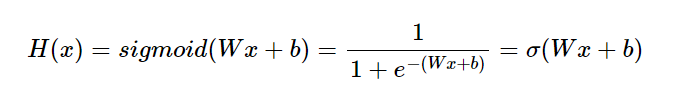



In [ ]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

def sigmoid(x):
  return 1/ (1+np.exp(-x))

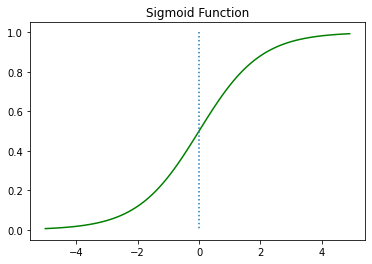

In [ ]:
# W가 1이고 b가 0인 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

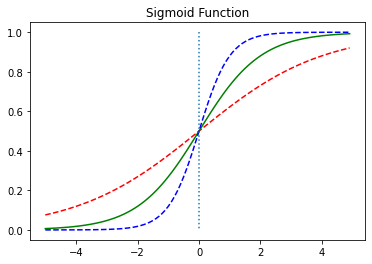

In [ ]:
# W값의 변화에 따른 경사도의 변화

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

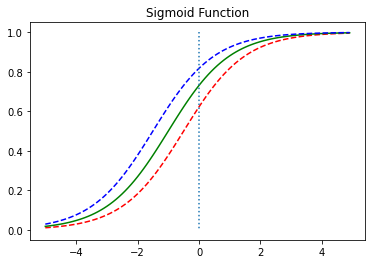

In [ ]:
# b값의 변화에 따른 좌, 우 이동

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#### Sigmoid function을 이용한 분류

- sigmoid function은 입력값이 클수록 1에 수렴하고 작을수록 0에 수렴한다.
- 즉 이 함수의 output은 0~1사이의 값을 가진다는 특성을 이용하여 분류 작업을 할 수 있다.

### Cost function

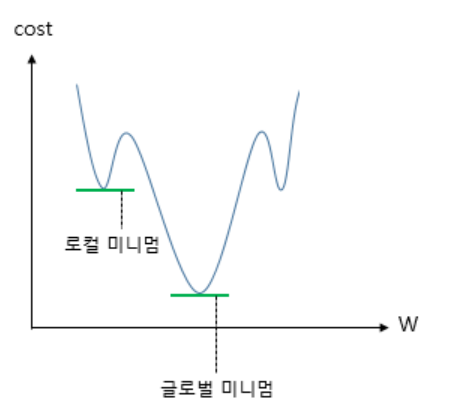

- 전체 함수에 걸쳐 진짜 최소값인 Global Minimum이 아닌 특정 구간에서의 최솟값인 Local Minimum에 도달하면 이는 cost가 최소가 되는 가중치 W를 찾은 것이 아니다.

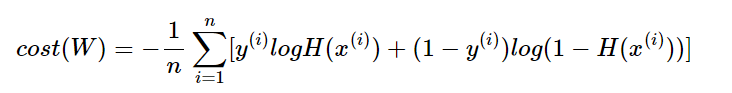
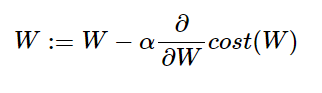

- cost function은 실제값 y와 예측값 H(x)의 차이가 커지면 cost가 커지고 차이가 작으면 cost도 작아진다. 이를 통해 경사 하강법을 수행하면서 최적의 가중치 W를 찾아간다.

### Logistic Regression 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
hypothesis = 1 / (1+torch.exp(-(x_train.matmul(W)+b)))
print(hypothesis)
# hypothesis = torch.sigmoid(x_train.matmul(W) + b)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [ ]:
losses = -(y_train * torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis))
print(losses)

cost = losses.mean()
print(cost)
# F.binary_cross_entropy(hypothesis, y_train)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()
    # cost = F.binary_corss_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [ ]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


## nn.Module로 Logistic Regression 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
model = nn.Sequential(
    nn.Linear(2,1), # input_dim = 2, output_dim = 1
    nn.Sigmoid()
)

In [ ]:
model(x_train) # 현재 W와 b가 랜덤 초기화된 상태이므로 정확한 예측 x

tensor([[0.3600],
        [0.2872],
        [0.6801],
        [0.4389],
        [0.5216],
        [0.7473]], grad_fn=<SigmoidBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  
  hypothesis = model(x_train)

  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.614994 Accuracy 66.67%
Epoch  100/1000 Cost: 0.140280 Accuracy 100.00%
Epoch  200/1000 Cost: 0.082549 Accuracy 100.00%
Epoch  300/1000 Cost: 0.058858 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045878 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037649 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031951 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027766 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024558 Accuracy 100.00%
Epoch  900/1000 Cost: 0.022020 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019960 Accuracy 100.00%


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2477, 1.5151]], requires_grad=True), Parameter containing:
tensor([-14.4576], requires_grad=True)]


### 인공 신경망으로 표현하는 Logistic Regression

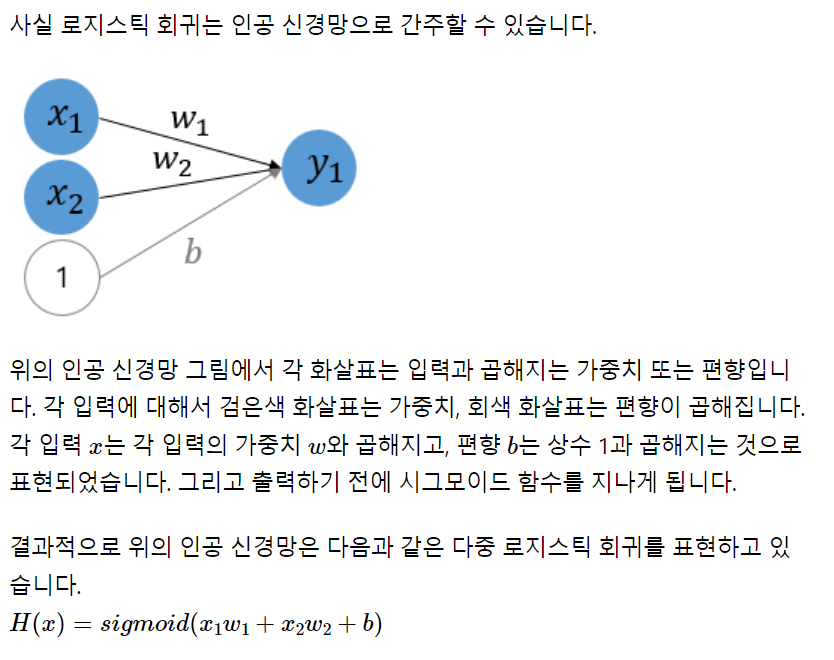

## Class로 PyTorch 모델 구현

### Model을 class로 구현

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self,x):
    return self.sigmoid(self.linear(x))


### Logistic Regression을 class로 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self,x):
    return self.sigmoid(self.linear(x))

model = BinaryClassifier()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = model(x_train)

  # cost 계산
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번마다 로그 출력
  if epoch % 200 == 0:
      prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
      correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
      accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
      print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
          epoch, nb_epochs, cost.item(), accuracy * 100,
      ))

Epoch    0/1000 Cost: 0.576740 Accuracy 83.33%
Epoch  200/1000 Cost: 0.080704 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045319 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031682 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024400 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019856 Accuracy 100.00%


# Softmax Regression
3개 이상의 선택지로부터 1개를 선택하는 문제인 다중 클래스 분류(Multi-Class classification)를 풀기 위한 소프트맥스 회귀

## One-Hot Encoding

### What is One-Hot Encoding

- 이는 선택해야 하는 선택지의 개수만큼 차원을 가지면서, 각 선택지의 인덱스에 해당되는 원소는 1, 나머지는 0의 값을 갖도록 하는 표현법임.
-원-핫 인코딩을 하기 위해서는 우선 각 선택지에 순차적으로 정수 인덱스를 부여합니다. 임의로 강아지는 0번 인덱스, 고양이는 1번 인덱스, 냉장고는 2번 인덱스를 부여하였다고 해봅시다. 이때 각 선택지에 대해서 원-핫 인코딩이 된 벡터는 다음과 같습니다.

강아지 = [1, 0, 0] 
고양이 = [0, 1, 0]
냉장고 = [0, 0, 1]
- 원-핫 인코딩으로 표현된 벡터를 원-핫 벡터(one-hot vector)라고 합니다.


### One-Hot vector의 무작위성(Random)
- 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳다. 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배해준다.
- 다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일합니다. 원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있습니다. 뒤에서 다시 언급되겠지만 이러한 원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 합니다.
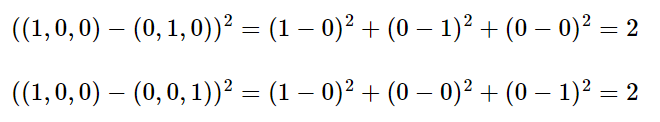

## Softmax Regression 이해

### Multi-class Classification

- 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류(Multi-class Classification)

#### Logistic Regression

- Logistic Regression에서 sigmoid function은 예측값을 0 ~ 1 사이의 값으로 만든다.
- 예를 들어 스팸메일 분류기를 구현하면 출력이 0.75라면 이는 이메일이 스팸일 확률이 75%이고 스팸이 아닐 확률이 25%라는 것을 의미함. 또한 이 두 확률의 합은 1이다.
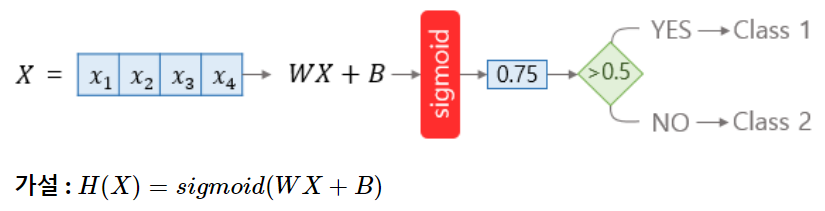

#### Softmax Regression

- 이는 확률의 총 합이 1이 되는 아이디어를 다중 클래스 분류 문제에 확장한 것임.
- 선택지의 개수만큼의 차원을 갖는 벡터를 만들어 해당 벡터가 벡터의 모든 원소의 합이 1이 되도록 표준화(?)시키는 함수를 거쳐야 한다.
- 이런 함수를 softmax라고 한다.
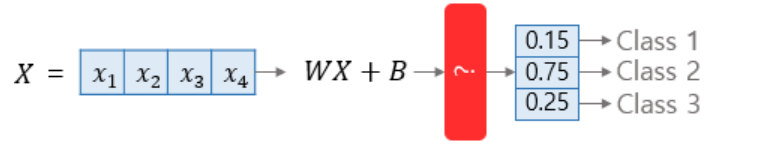

### Softmax function



#### Cost Function
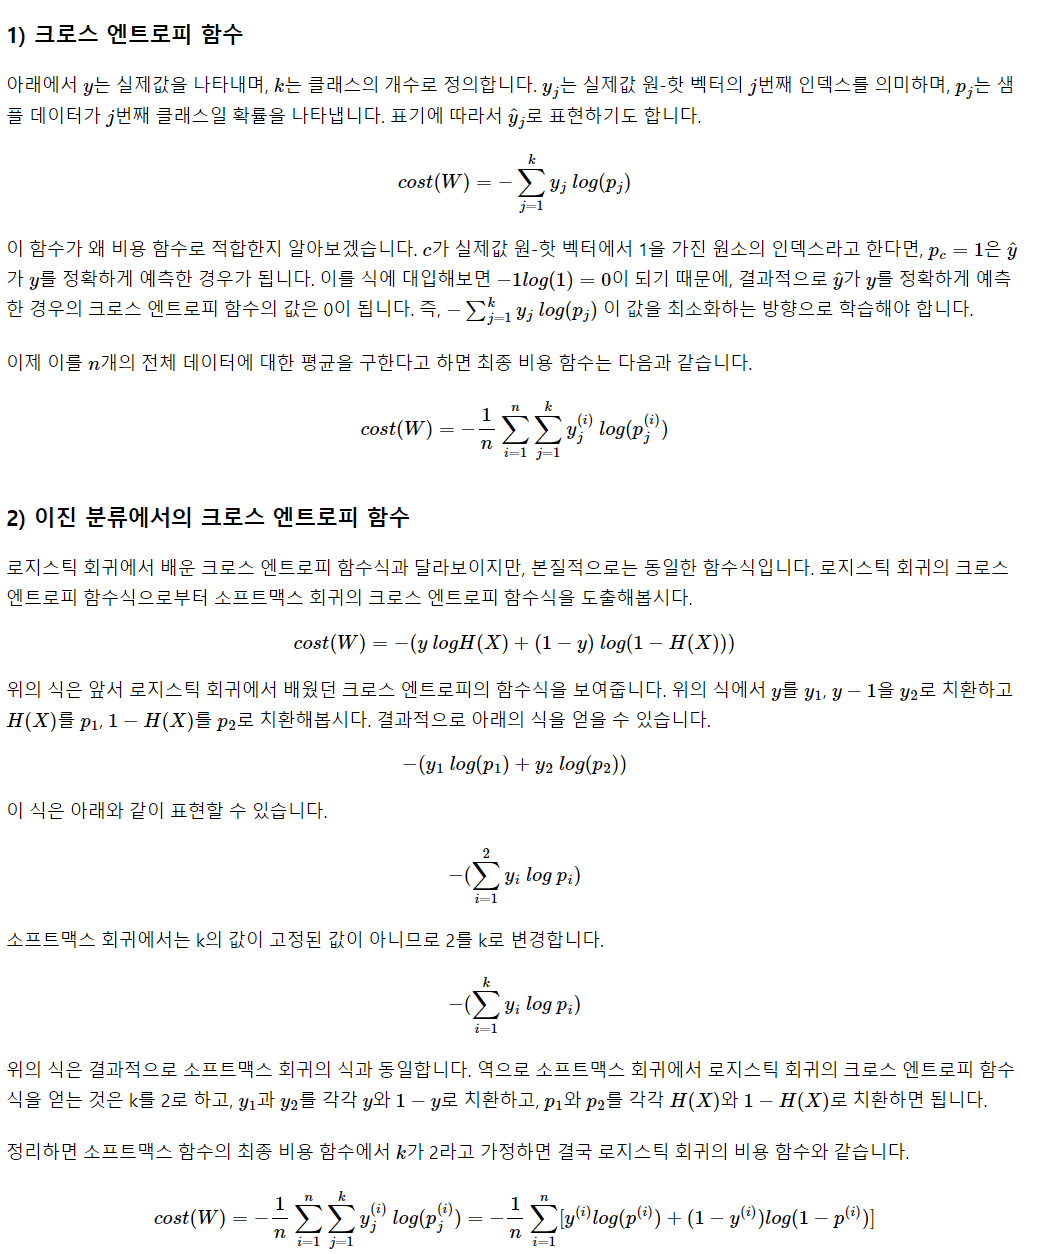

## Softmax Regression의 Cost function 구현

### Softmax의 Cost function 구현 (low level) by PyTorch

In [ ]:
z = torch.FloatTensor([1,2,3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)
print(hypothesis.sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [ ]:
z = torch.rand(3,5, requires_grad=True)
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([[0.3412, 0.2938, 0.2671, 0.4002, 0.2469],
        [0.3559, 0.3306, 0.3796, 0.3393, 0.3719],
        [0.3029, 0.3756, 0.3533, 0.2605, 0.3812]], grad_fn=<SoftmaxBackward0>)


In [ ]:
y = torch.randint(5,(3,)).long()
print(y)

tensor([0, 2, 1])


In [ ]:
y_one_hot = torch.zeros_like(hypothesis)
print(y_one_hot)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)  # scatter은 one hot encoding할때 유용함.

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [ ]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.0078, grad_fn=<MeanBackward0>)


### Sotfmax의 Cost function 구현 (high level) by PyTorch

#### F.softmax() + torch.log() = F.log_softmax()

In [ ]:
# low level
torch.log(F.softmax(z, dim=1))

# high level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

#### F.log_softmax() + F.nll_loss() = F.cross_entropy

In [ ]:
# low level
# 첫번째 수식
(y_one_hot * - torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [ ]:
# 두번째 수식
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [ ]:
# high level
# nll이란 Negative Log Likelihood
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [ ]:
# 네번째 수식
# 이에는 cost function & softmax function 까지 포함되어있음
F.cross_entropy(z,y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

## Softmax Regression 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


### low level 구현

In [ ]:
y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1),1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [ ]:
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr = 0.1)

In [ ]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)

  cost = (y_one_hot * - torch.log(hypothesis)).sum(dim=1).mean()

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


### high level 구현

In [ ]:
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  z = x_train.matmul(W) + b

  cost = F.cross_entropy(z, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


### nn.Module로 구현

In [ ]:
model = nn.Linear(4, 3)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


### Class로 구현

In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output이 3!

    def forward(self, x):
        return self.linear(x)

model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428281
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


## MNIST 데이터 분류 by Softmax Regression

### MNIST 데이터 이해

- 각 이미지는 28 * 28 (784)

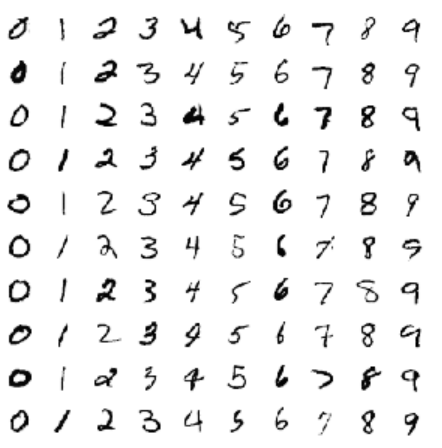

### Torchvision이란?

- 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지

### Classfier 구현

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# hyperparameters
training_epochs = 15
batch_size = 100

다음 기기로 학습합니다: cpu


### MNIST classifier 구현

In [ ]:
mnist_train = dsets.MNIST(root="MNIST_data/", # MNIST 데이터를 다운받는 경로
                          train=True, 
                          transform=transforms.ToTensor(), # 데이터를 PyTorch 텐서로 변환
                          download=True) # 해당 경로헤 데이터가 없다면 다운받는다는 의미

mnist_test = dsets.MNIST(root="MNIST_data/",
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
data_loader = DataLoader(dataset=mnist_train,
                        batch_size=batch_size,
                        shuffle=True,
                        drop_last=True) # 마지막 batch를 버릴 것인지를 결정
                                        # 마지막 batch에 애매한 수가 있다면 마지막 batch에서 
                                        # 상대적으로 과대평가가 될 수 있기 때문

In [ ]:
linear = nn.Linear(784, 10, bias=True).to(device) # size=28*28=764 / class=10
# to() 함수는 연산을 어디서 수행할지를 정함.

In [ ]:
criterion = nn.CrossEntropyLoss().to(device) # 내부에 softmax 포함
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577745
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404700
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456524
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515589
Epoch: 0011 cost = 0.281914085
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422735
Learning finished


Accuracy: 0.8883000016212463
Label:  3
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


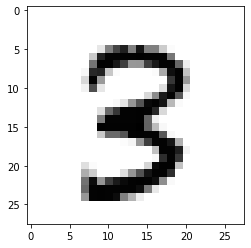

In [ ]:
# 테스트 데이터를 사용하여 모델 테스트
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

# Artificial Neural Network (인공 신경망)

## Machine Learning 용어 이해

### Machine Learning Model의 평가

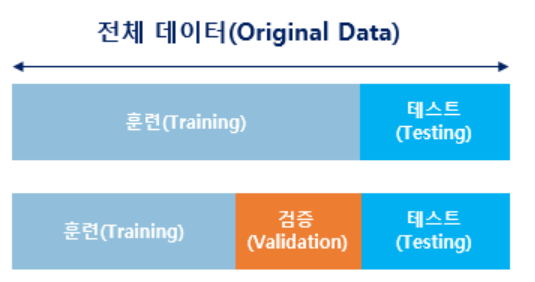
- 실제 모델을 평가하기 위해서 데이터를 훈련용, 검증용, 테스트용 이렇게 세 가지로 분리하는 것이 일반적
- 하이퍼파라미터와 매개변수의 가장 큰 차이는 하이퍼파라미터는 보통 사용자가 직접 정해줄 수 있는 변수
- 매개변수는 사용자가 결정해주는 값이 아니라 모델이 학습하는 과정에서 얻어지는 값
- 훈련용 데이터로 훈련을 모두 시킨 모델은 검증용 데이터를 사용하여 정확도를 검증하며 하이퍼파라미터를 튜닝(tuning)
- 튜닝 후 테스트 데이터를 가지고 모델의 진짜 성능을 평가

### Classification과 Regression

#### Binary Classification
- 이진 분류는 주어진 입력에 대해서 둘 중 하나의 답을 정하는 문제

#### Multi-class Classification
- 주어진 입력에 대해서 세 개 이상의 정해진 선택지 중에서 답을 정하는 문제

#### Regression
- 분류 문제처럼 0 또는 1이나 과학 책장, IT 책장 등과 같이 분리된(비연속적인) 답이 결과가 아니라 연속된 값을 결과로 가진다.

### Supervised Learning(지도 학습)과 Unsupervised Learning(비지도 학습)



#### Supervised Learning
- Label이라는 정답과 함께 학습하는 것
- 기계는 예측값과 실제값의 차이인 오차를 줄이는 방식으로 학습을 하게 되는데 예측값은 y_hat과 같이 표현

#### Unsupervised Learning
- 목적 데이터(또는 레이블)이 없는 학습 방법
- 대표적으로 군집(clustering)이나 차원 축소와 같은 학습 방법

#### Reinforcement Learning
- 어떤 환경 내에서 정의된 에이전트가 현재의 상태를 인식하여, 선택 가능한 행동들 중 보상을 최대화하는 행동 혹은 행동 순서를 선택하는 방법

### Sample과 Feature(특성)

- 많은 머신러닝 문제가 1개 이상의 독립변수 x를 가지고 종속변수 y를 예측하는 것
- 많은 머신러닝 모델(특히 ANN)은 독립변수, 종속변수, 가중치, 편향 등을 행렬 연산을 통해 연산하곤 함.
- 머신러닝에서 하나의 데이터, 하나의 행을 Sample이라 하며, 종속변수 y를 예측하기 위한 각각의 독립변수 x를 feature라고 함.

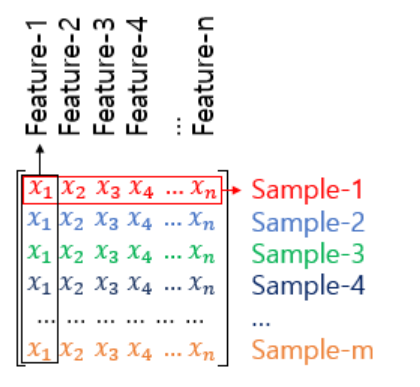

### Confusion Matrix (혼동 행렬)

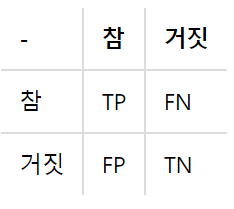
- 이를 각각 TP(True Positive), TN(True Negative), FP(False Postivie), FN(False Negative)라고 하는데 True는 정답을 맞춘 경우고 False는 정답을 맞추지 못한 경우임 그리고 Positive와 Negative는 각각 제시했던 정답임. 즉, TP는 양성(Postive)이라고 대답하였고 실제로 양성이라서 정답을 맞춘 경우임. TN은 음성(Negative)이라고 대답하였는데 실제로 음성이라서 정답을 맞춘 경우임.

- 그럼 FP는 양성이라고 대답하였는데, 음성이라서 정답을 틀린 경우이며 FN은 음성이라고 대답하였는데 양성이라서 정답을 틀린 경우가 됨. 그리고 이 개념을 사용하면 또 새로운 개념인 정밀도(Precision)과 재현률(Recall)이 됨.

#### Precision(정밀도)와 Recall(재현률)
- 정밀도은 양성이라고 대답한 전체 케이스에 대한 TP의 비율
- 재현률은 실제값이 양성인 데이터의 전체 개수에 대해서 TP의 비율 즉, 양성인 데이터 중에서 얼마나 양성인지를 예측(재현)했는지를 나타냄.

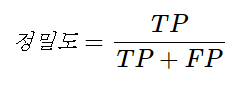
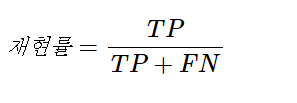

### Overfitting(과적합)과 Underfitting(과소적합)


Overfitting이란 훈련 데이터를 과하게 학습한 경우를 말함. 이런 경우는 보통 훈련 데이터와 테스트 데이터간에 accuracy나 loss에서 극명한 차이를 보임.

Underfitting이란 훈련 자체를 너무 부족하게 하는 것을 의미함. 아직 성능이 향상될 여지가 있음에도 불구하고 훈련을 멈춰 훈련이 덜 된 상태를 말함.

이중 특히 Overfitting을 막는 방법으로 Dropout, Early Stopping 같은 여러 방법이 존재함.

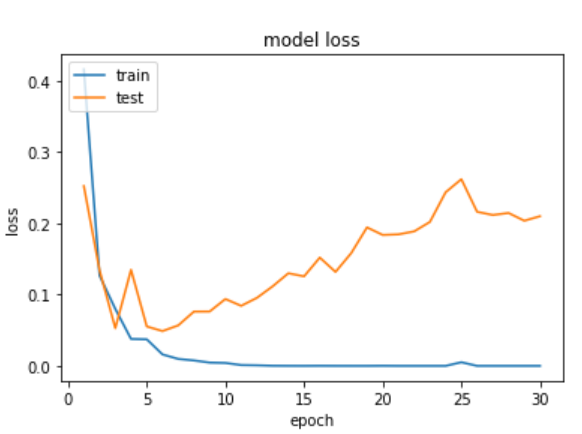

## 퍼셉트론(Perceptron)

### 퍼셉트론(Perceptron)

- Perceptron은 1975년 Frank Rosenblatt가 제안한 초기 형태의 인공신경망으로 다수의 입력으로 하나의 결과를 내보내는 알고리즘임.

- 각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지면 해당 입력값과 가중치의 곱의 전체 합이 threshold를 넘으면 종착지에 있는 인공 뉴런이 출력신호로 1을 출력하고, 그렇지 않으면 0을 출력함.
- 이는 가중치의 값이 클수록 해당 입력값에 따라 출력 값이 크게 변화하기 때문에 적절한 입력값을 주는 것이 중요함.
- 이후 뉴런에서 출력값을 변경시키는 Activation Function을 거치게 됨.